## Data Cleaning
First, load the data from our XLSX file.

In [63]:
import pandas as pd

edmonton_air_quality = pd.read_excel('data/Edmonton2016.xlsx', sheet_name='PM2.5-10')

print(edmonton_air_quality.columns)

Index(['Sampler', 'Unnamed: 1', 'Unnamed: 2', 'S-1', 'S-1.1', 'S-1.2', 'S-1.3',
       'S-1.4', 'S-1.5', 'S-1.6', 'S-1.7'],
      dtype='object')


So these column names don't make a lot of sense. When looking into the data, the first 10 rows are metadata.

In [64]:
labels = (edmonton_air_quality.iloc[8, :])
edmonton_air_quality = edmonton_air_quality[9:]
edmonton_air_quality.columns = labels
print(edmonton_air_quality.head())

8  NAPS Site ID        Sampling Date Sample Type  PM2.5-10 PM2.5-10-MDL  \
9         90132  2016-01-01 00:00:00           R   28.1111      0.37037   
10        90132  2016-01-04 00:00:00           R   14.8009      0.37037   
11        90132  2016-01-07 00:00:00           R   2.75463      0.37037   
12        90132  2016-01-10 00:00:00           R      -999         -999   
13        90132  2016-01-13 00:00:00           R  0.666667      0.37037   

8  PM2.5-10-Vflag    Pres. Temp. Start Time End Time Actual Volume  
9                  93.5923    -3      00:00    24:00           2.4  
10                 92.7924   -10      00:00    24:00           2.4  
11                 93.5923  -9.3      00:00    24:00           2.4  
12             M1     -999  -999       -999     -999          -999  
13                 91.8591   3.1      00:00    24:00           2.4  


So our labels and data seem a little more sensible. To produce anything meaningful, it is important to engage our data and see if there are clear irregularities and outliers in our data. An useful procedure is to perform an ANOVA test or even plotting our data to see if we can catch the rogue datum.

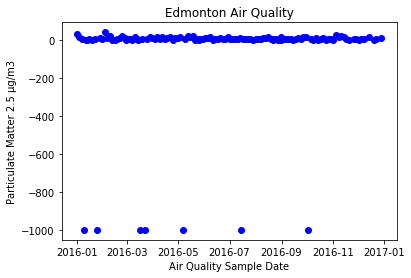

In [72]:
import matplotlib.pyplot as plt
plt.ylabel('Particulate Matter 2.5 µg/m3')
plt.xlabel('Air Quality Sample Date')
plt.title('Edmonton Air Quality')
plt.plot(edmonton_air_quality['Sampling Date'], edmonton_air_quality['PM2.5-10'], 'bo')

plt.show()